In [28]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
#MNIST is a collection of handwritten digits ranging from 0 to 9. It has a training set of
#60,000 images, and 10,000 test images that are classified into corresponding categories or labels. In some literature, the term target or ground truth is also used to refer to the label.

In [29]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [30]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [31]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [32]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


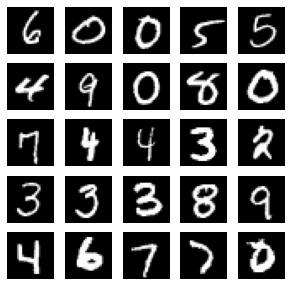

In [33]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')


In [34]:
plt.savefig("mnist-samples.png")
plt.show()
plt.close('all')


<Figure size 432x288 with 0 Axes>

In [ ]:
Train labels:{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [36]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist


In [37]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [38]:
# compute the number of labels
num_labels = len(np.unique(y_train))


In [39]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
  
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size


In [40]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255


In [41]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

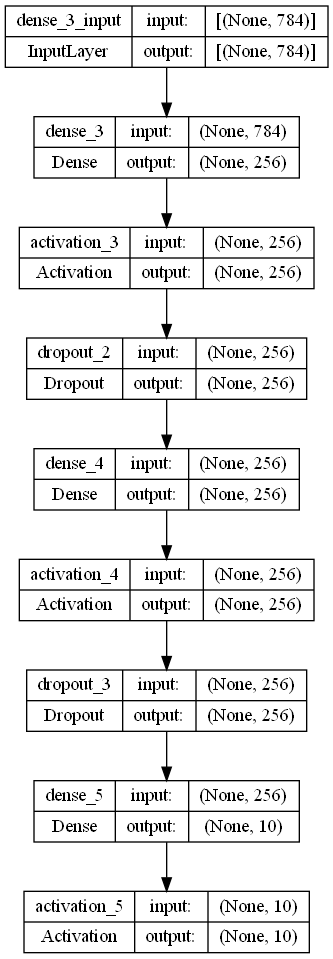

In [42]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)


In [43]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)


Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.4261 - accuracy: 0.8689
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1927 - accuracy: 0.9421
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1530 - accuracy: 0.9549
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1263 - accuracy: 0.9616
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1133 - accuracy: 0.9659
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1025 - accuracy: 0.9678
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0975 - accuracy: 0.9702
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0889 - accuracy: 0.9725
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0826 - accuracy: 0.9747
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0773 - accuracy: 0.9760

In [44]:
# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))



Test accuracy: 98.1%


In [51]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [52]:
# compute the number of labels
num_labels = len(np.unique(y_train))


In [53]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [54]:
# image dimensions (assumed square) 400
image_size = x_train.shape[1]
input_size = image_size * image_size


In [55]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255


In [64]:
# model is a 3-layer MLP with ReLU and dropout after each layer model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector 
model.add(Activation('softmax'))


In [65]:
from tensorflow.keras.regularizers import l2
model.add(Dense(hidden_units,
                kernel_regularizer=l2(0.001),
                input_dim=input_size))


In [66]:
# loss function for one-hot vector 
# use of adam optimizer
# accuracy is a good metric for classification tasks 
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

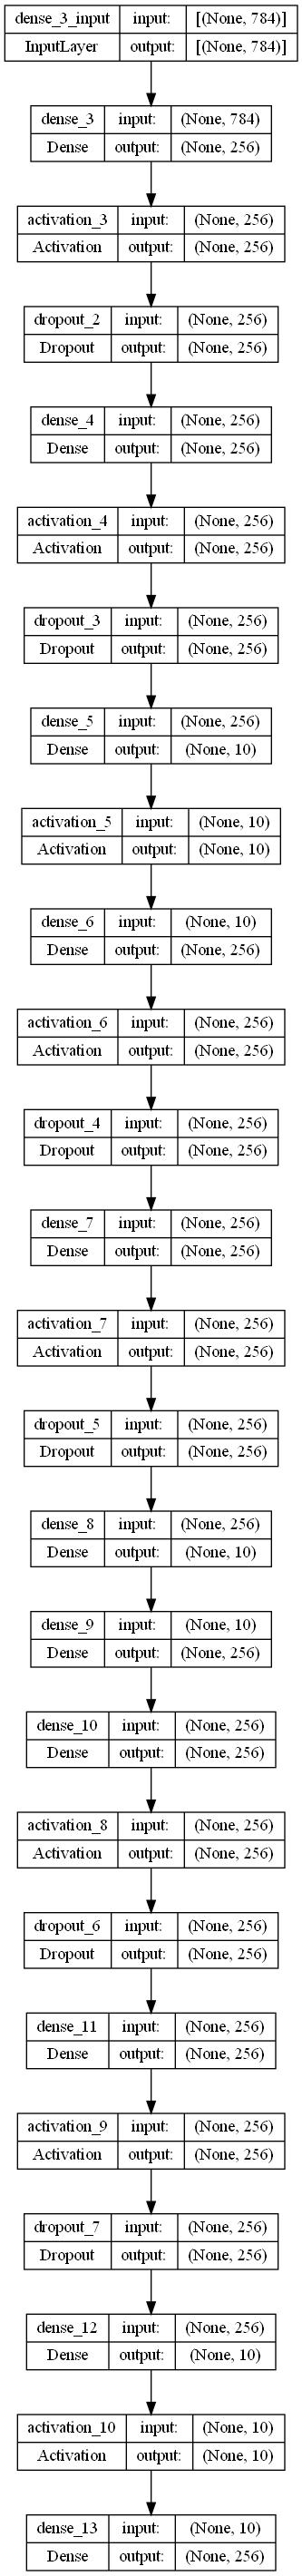

In [68]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)